In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing

In [2]:
dfX,dfy= fetch_california_housing(return_X_y=True,as_frame=True)


In [3]:
dfX.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
dfX.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [6]:
dfX.columns[0]

'MedInc'

In [7]:
X=dfX.values
y=dfy.values.reshape(-1,1)

In [8]:
X.shape
y.shape

(20640, 1)

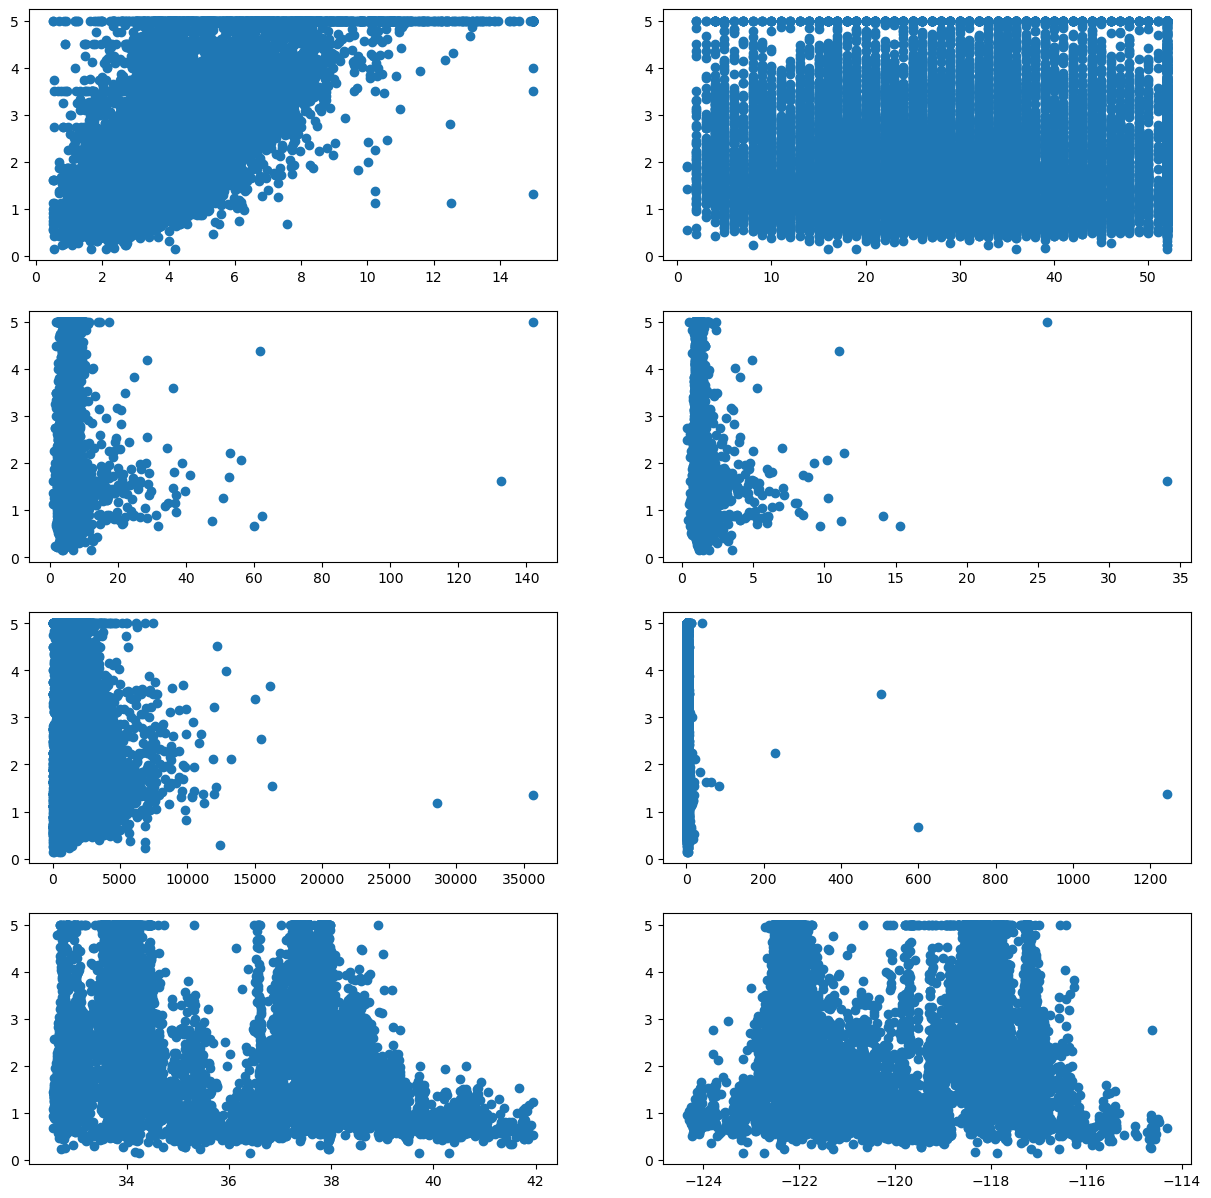

In [9]:
fig,axs=plt.subplots(4,2,figsize=(15,15))

for i in range(4):
    for j in range(2):
        axs[i,j].plot(X[:,i*2+j],y,'o')

In [10]:
from scipy.stats import pearsonr

In [11]:
X.shape

(20640, 8)

In [12]:
for i in range(X.shape[1]):
    print(f"Correlation between x{i+1}=> {dfX.columns[i]} and y = {pearsonr(X[:,i],y[:,0])[0]:.2f}")

Correlation between x1=> MedInc and y = 0.69
Correlation between x2=> HouseAge and y = 0.11
Correlation between x3=> AveRooms and y = 0.15
Correlation between x4=> AveBedrms and y = -0.05
Correlation between x5=> Population and y = -0.02
Correlation between x6=> AveOccup and y = -0.02
Correlation between x7=> Latitude and y = -0.14
Correlation between x8=> Longitude and y = -0.05


In [13]:
X=np.concatenate((np.ones((X.shape[0],1)),X),axis=1)

In [84]:
X.shape

(20640, 9)

In [14]:
X[1]

array([ 1.00000000e+00,  8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
        9.71880492e-01,  2.40100000e+03,  2.10984183e+00,  3.78600000e+01,
       -1.22220000e+02])

In [15]:
X_nom=X.copy()
minX=np.min(X[:,1:])
maxX=np.max(X[:,1:])
X_nom[:,1:]=(X[:,1:]-minX)/(maxX-minX)
X_nom[1:10,:]

array([[1.00000000e+00, 3.70468925e-03, 4.05933584e-03, 3.64706643e-03,
        3.49999038e-03, 7.05279929e-02, 3.53177137e-03, 4.53020205e-03,
        5.94866553e-05],
       [1.00000000e+00, 3.67553241e-03, 4.92510407e-03, 3.70431880e-03,
        3.50282691e-03, 1.73251393e-02, 3.55110923e-03, 4.52992277e-03,
        5.89280952e-05],
       [1.00000000e+00, 3.63044823e-03, 4.92510407e-03, 3.63531473e-03,
        3.50281610e-03, 1.90566757e-02, 3.54400673e-03, 4.52992277e-03,
        5.86488151e-05],
       [1.00000000e+00, 3.58026439e-03, 4.92510407e-03, 3.64828734e-03,
        3.50304013e-03, 1.92521718e-02, 3.53377172e-03, 4.52992277e-03,
        5.86488151e-05],
       [1.00000000e+00, 3.58558747e-03, 4.92510407e-03, 3.60583131e-03,
        3.50366979e-03, 1.50071147e-02, 3.53261073e-03, 4.52992277e-03,
        5.86488151e-05],
       [1.00000000e+00, 3.57503906e-03, 4.92510407e-03, 3.61058602e-03,
        3.49941733e-03, 3.40260876e-02, 3.53228979e-03, 4.52964349e-03,
        5.8

In [165]:
theta0=np.zeros((X.shape[1],1))+0.4

y_pred=X_nom.dot(theta0)
y_pred

array([[0.41443698],
       [0.43742421],
       [0.41650915],
       ...,
       [0.42175437],
       [0.41879445],
       [0.42599933]])

In [195]:
sorted_idx=np.argsort(y_pred[:,0])
sorted_idxX=np.argsort(y[:,0])

In [196]:
sorted_idx

array([ 3126, 12286,  3125, ..., 13139,  9880, 15360])

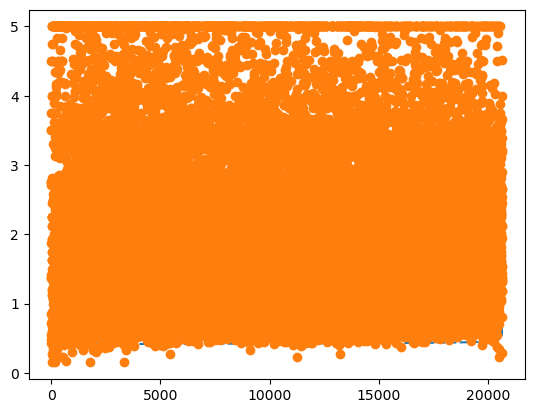

In [197]:

plt.plot(y_pred[sorted_idx,0],'--')
plt.plot(y[sorted_idx,0],'o')

In [99]:
m=X.shape[0]

In [176]:
def grad(theta):
    return (X_nom.T).dot(X_nom.dot(theta)-y) # using vectorization

In [177]:
def grad2(theta):
    gs=(1/m)*np.sum((X_nom.dot(theta)-y)*X_nom,axis=0).reshape(-1,1)# using vector

    return gs



In [139]:
grad(theta0)

array([[6.39647252e+02],
       [2.11134838e+00],
       [2.52448234e+00],
       [2.26554709e+00],
       [2.24379988e+00],
       [3.97489693e+01],
       [2.31606178e+00],
       [2.89847051e+00],
       [9.94654762e-02]])

In [140]:
a=grad2(theta0)
a.shape

(9, 1)

In [174]:
def cost(theta):
    j=(1/(2*m))*((X_nom.dot(theta)-y).T).dot((X_nom.dot(theta)-y))
    return j[0][0]

In [175]:
def cost2(theta):

    return (1/(2*m))*np.sum((X_nom.dot(theta)-y)**2,axis=0)[0]

In [143]:
cost2(theta0)

0.028931277028425923

In [144]:
cost(theta0)

0.028931277028425923

In [145]:
def predict(X,theta):
    return X.dot(theta)

In [180]:
def GD(theta0,learning_rate=0.03,epochs=1000,TOL=1e-7):
    thetahistory=[theta0]
    J_history=[cost(theta0)]
    thetaNew=theta0*1000
    print(f'epoch\t cost(J)\t')
    for epoch in range(epochs):
        if epoch%100==0:
            print(f'{epoch:5}\t{J_history[-1]:7.4f}\t')
        dj=grad2(theta0)
        J=cost(theta0)
        #print(J)
        thetaNew=theta0-learning_rate*dj
        thetahistory.append(thetaNew)
        J_history.append(J)

        if np.sum((thetaNew-theta0)**2)<TOL:
            print("Convergence achieved")
            break 
        theta0=thetaNew
    return thetaNew,thetahistory,J_history

    

In [181]:
theta,theta_history,J_history = GD(theta0)


epoch	 cost(J)	
    0	 2.0142	
  100	 0.6695	
Convergence achieved


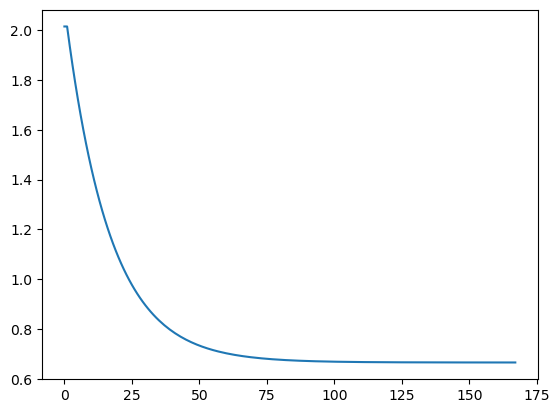

In [182]:
plt.plot(J_history)


In [187]:
yprednorm = X_nom.dot(theta)
sorted_idx=np.argsort(yprednorm[:,0])


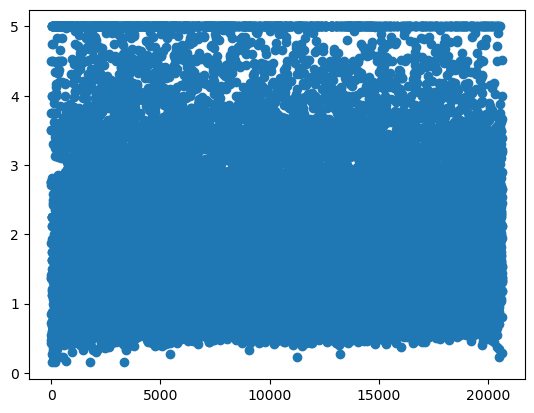

In [191]:
	

sorted_idx=np.argsort(yprednorm[:,0])


# plt.plot(yprednorm[sorted_idx,0],'o')
plt.plot(y[sorted_idxX,0],'o')